In [1]:
import os
train_dir = './input/dataset1/train'
validation_dir ='./input/dataset1/test'

train_1_dir = os.path.join(train_dir, '연갈탄')

train_2_dir = os.path.join(train_dir, '유연탄')

validation_1_dir = os.path.join(validation_dir, '연갈탄')

validation_2_dir = os.path.join(validation_dir, '유연탄')

In [2]:
train_1_fnames = os.listdir(train_1_dir)
print(train_1_fnames[:10])

train_2_fnames = os.listdir(train_2_dir)
train_2_fnames.sort()
print(train_2_fnames[:10])

['0.jpg', '1.jpg', '11.jpg', '12.jpg', '14.jpg', '15.jpg', '17.jpg', '18.jpg', '20.jpg', '21.jpg']
['10.png', '100.png', '101.png', '102.png', '104.png', '105.png', '107.png', '108.png', '109.png', '110.png']


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
pic_index = 0

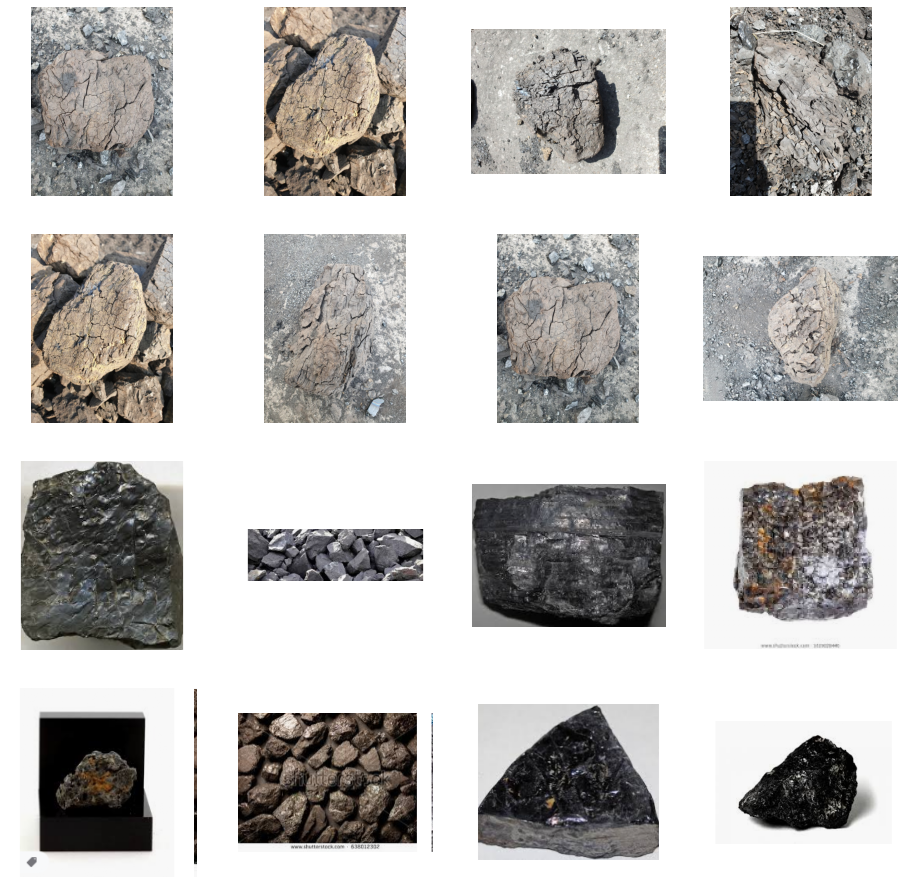

In [4]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_1_pix = [os.path.join(train_1_dir, fname) 
                for fname in train_1_fnames[pic_index-8:pic_index]]
next_2_pix = [os.path.join(train_2_dir, fname) 
                for fname in train_2_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_1_pix+next_2_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [5]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [6]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = layers.Input(shape=(150, 150, 3))

# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
x = layers.Flatten()(x)

# Create a fully connected layer with ReLU activation and 512 hidden units
x = layers.Dense(512, activation='relu')(x)

# Create output layer with a single node and sigmoid activation
output = layers.Dense(1, activation='sigmoid')(x)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model = Model(img_input, output)

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)       

In [8]:
model.compile(loss="binary_crossentropy", optimizer="nadam",metrics=['acc'])

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150),  
        batch_size=35,
        
        class_mode='binary')


validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=35,
        class_mode='binary')

Found 2791 images belonging to 4 classes.
Found 20 images belonging to 2 classes.


In [10]:
history=model.fit(train_generator,
epochs = 30,
validation_data = validation_generator
)

Epoch 1/30
80/80 [==============================] - 34s 428ms/step - loss: -37.9602 - acc: 0.7997 - val_loss: 5111.4150 - val_acc: 0.7000
Epoch 2/30
80/80 [==============================] - 20s 256ms/step - loss: -47152.6484 - acc: 0.8269 - val_loss: 80258.7188 - val_acc: 0.8500
Epoch 3/30
80/80 [==============================] - 20s 252ms/step - loss: -1706032.3750 - acc: 0.8302 - val_loss: 2759146.0000 - val_acc: 0.7500
Epoch 4/30
80/80 [==============================] - 21s 262ms/step - loss: -13672292.0000 - acc: 0.8434 - val_loss: 12515001.0000 - val_acc: 0.8000
Epoch 5/30
80/80 [==============================] - 21s 261ms/step - loss: -66859588.0000 - acc: 0.8424 - val_loss: 51060016.0000 - val_acc: 0.8000
Epoch 6/30
80/80 [==============================] - 21s 259ms/step - loss: -211320944.0000 - acc: 0.8445 - val_loss: 104821992.0000 - val_acc: 0.9000
Epoch 7/30
80/80 [==============================] - 20s 255ms/step - loss: -528798208.0000 - acc: 0.8488 - val_loss: 299889856.0

<Figure size 432x288 with 0 Axes>

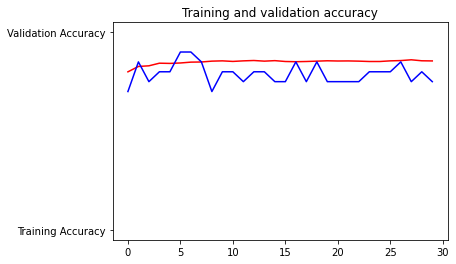

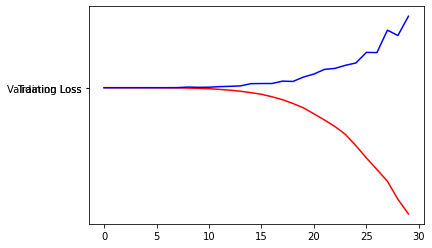

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()



In [12]:

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model


def load_image(filename):
	img = load_img(filename, target_size=(150,150))
	img = img_to_array(img)
	img = img.reshape(1,150,150, 3)
	img = img.astype('float32')
	return img

test_dir ='./input/dataset1/valid'
test_1_dir = os.path.join(test_dir, '연갈탄')
test_2_dir = os.path.join(test_dir, '유연탄')

test_1_fnames = os.listdir(test_1_dir)
test_2_fnames = os.listdir(test_2_dir)

test_1_pix = [os.path.join(test_1_dir, fname) 
                for fname in test_1_fnames]
test_2_pix = [os.path.join(test_2_dir, fname) 
                for fname in test_2_fnames]
p1=0

for j in test_1_pix:
    img = load_image(j)
    result = model.predict(img)
    if(result[0]==0):
        p1=p1+1
p2=0
for j in test_2_pix:
    img = load_image(j)
    result = model.predict(img)
    if(result[0]==1):
        p2=p2+1

In [13]:
print(p1)

3


In [14]:
print(p2)

6
